<a href="https://colab.research.google.com/github/actuary84/study/blob/main/%5B%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%8B%A4%EC%8A%B5%5D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##선형 회귀 모델
- https://youtu.be/DknCnKdyP6k
- 일반적으로 데이터분석에는 sklearn을 더 많이 사용하나, statsmodels의 summary 기능이 통계량을 더 잘 정리해서 출력해주기 때문에 statsmodels를 사용함

In [50]:
#한글 폰트 설정 (런타임 다시시작 필요, Ctrl+M)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,338 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and di

###1.데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [ ]:
data

In [ ]:
target

In [2]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [3]:
X = pd.DataFrame(data,columns=feature_names)

In [37]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
y=pd.DataFrame(target,columns=['MEDV'])

In [40]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [41]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


###2.Train set / Test Set 나누기

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2021) #test_size는 20~30%

###3.선형회귀 모델 구축
- statsmodel의 OLS를 사용: 잔차의 제곱합이 최소화 되는 파라미터를 구하는 방법
- 모델 선언: model = sm.OLS(X데이터, y데이터)
- 모델 학습: model_trained = model.fit()

In [6]:
#β0 추가(변수명 const,값은 1로 구성)
X_train = sm.add_constant(X_train) 

#model fitting
model = sm.OLS(y_train, X_train)
model_trained = model.fit()

###4.선형회귀 모델 가정

####4.1 확률 오차(Random error)의 정규성 확인


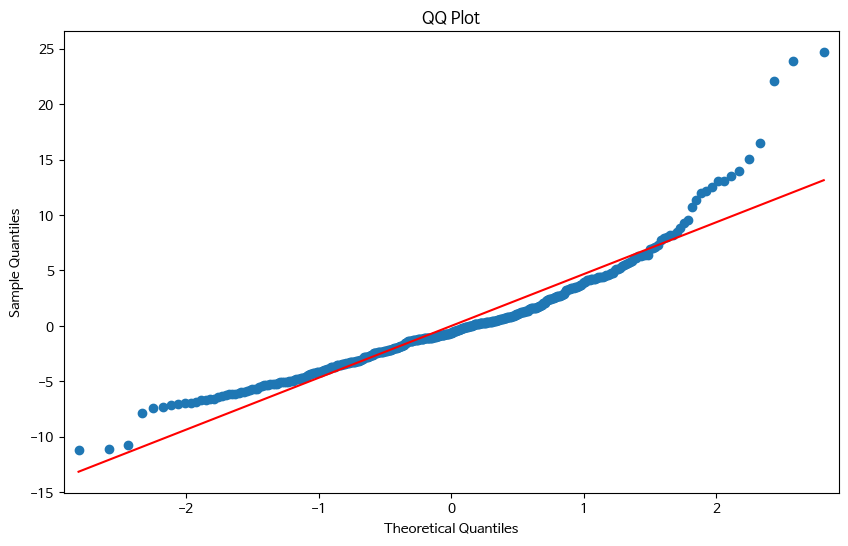

In [12]:
model_residuals = model_trained.resid

#폰트설정
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.set_title('QQ Plot')
sm.qqplot(model_residuals,line='s',ax=ax) #점선과 직선이 일치할 수록 정규분포를 따른다
plt.show()


####4.2 확률 오차(Random Error)의 등분산성 확인

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

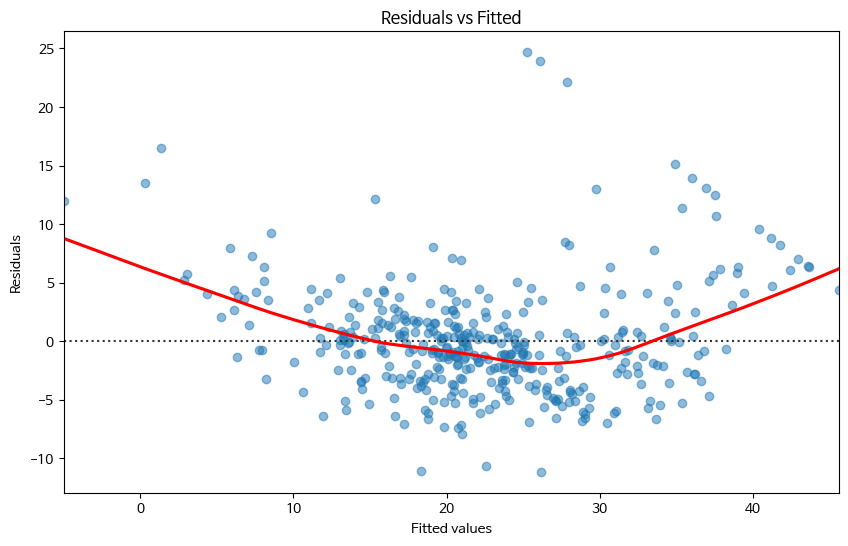

In [40]:
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(figsize=(10,6))
#https://www.youtube.com/watch?v=UMOtNeFEjaE
sns.residplot(data=X_train,x=model_fitted_y,y=y_train, lowess=True, scatter_kws={'alpha':0.5},line_kws={'color':'red'},ax=ax)
ax.set_title('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')


###5.통계적으로 해석하기
- R-squared(결정계수): 모델의 성능
- coef(회귀계수): X가 한 단위 증가할 때 Y의 변화량
- p>|t|가 α(0.05) 이하일때 유의미

In [42]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          1.02e-110
Time:                        15:53:01   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

###6.기울기에 대한 가설검정
- 위 summary에서 p-value값이 높은 INDUS, AGE는 상대적으로 유의하지 않기 때문에 2가지 변수를 제거 후 다시 모델을 구축

In [47]:
model = sm.OLS(y_train, X_train.drop(['INDUS','AGE'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          1.19e-112
Time:                        16:00:47   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

###7.미래의 반응변수 값 예측
- 학습에 사용된 값이 input으로 들어왔을 때 잘 예측이 되는지 보는 것

(0.0, 55.0)

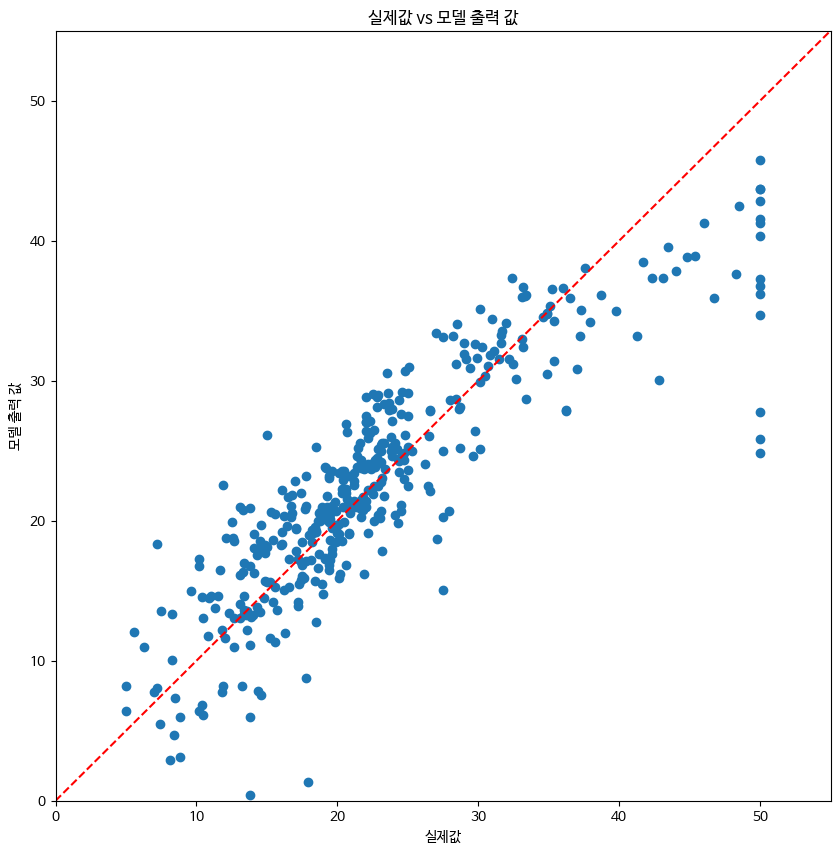

In [66]:
y_train_pred= model_trained.fittedvalues

plt.figure(figsize=(10,10))
plt.title('실제값 vs 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([0,55],[0,55], ls='--',c='r') #(0,0)에서 (55,55)까지 직선
plt.xlabel('실제값')
plt.ylabel('모델 출력 값')
plt.xlim(0,55)
plt.ylim(0,55)

In [63]:
X_test = sm.add_constant(X_test)

In [68]:
y_test_pred = model_trained.predict(X_test.drop(['INDUS','AGE'], axis=1))
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

###8.모델 평가

####8.1 Mean Squared Error (평균 제곱 오차)

In [103]:
MSE_test = mean_squared_error(y_test, y_test_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)

print(f'MSE_train: {MSE_train}, MSE_test:{MSE_test}')


MSE_train: 21.881143379080047, MSE_test:23.063158240353822


####8.2 Root Mean Squared Error (제곱근 평균 제곱 오차)

In [104]:
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
RMSE_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
print(f'RMSE_train: {RMSE_train}, RMSE_test:{RMSE_test}')

RMSE_train: 4.677728442212101, RMSE_test:4.8024117108338205


####8.3 Mean Absolute Error (평균 절대 오차)

In [105]:
MAE_test = mean_absolute_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred)
print(f'MAE_train: {MAE_train}, MAE_test:{MAE_test}')

MAE_train: 3.315339723533112, MAE_test:3.5123023508951166


####8.4 Mean Absolute Percentage Error (평균 절대 백분율 오차)
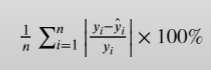

In [106]:
def mean_absolute_percentage_error(y_i, y_i_hat):
  y_i, y_i_hat = np.array(y_i), np.array(y_i_hat)
  return np.mean(np.abs((y_i-y_i_hat)/y_i))*100

MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)
MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)
print(f'MAPE_train: {MAPE_train}, MAPE_test:{MAPE_test}')

MAPE_train: 51.17350377693904, MAPE_test:43.94575164039092


####8.5 결정계수

In [107]:
R2_test = r2_score(y_test, y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
print(f'R2_train: {R2_train}, R2_test:{R2_test}')

R2_train: 0.7558046291691819, R2_test:0.6389403215499566


####8.6 Train set과 Test set에 대한 성능평가

In [111]:
#Train set
metrics_name = ['MSE', 'RMSE','MAE', 'MAPE','R2']
metrics_train = [MSE_train, RMSE_train, MAE_train, MAPE_train, R2_train]

for name, value in zip(metrics_name, metrics_train):
    print(f'{name}:\t{value:.3f}')


MSE:	21.881
RMSE:	4.678
MAE:	3.315
MAPE:	51.174
R2:	0.756


In [112]:
#Test set
metrics_name = ['MSE', 'RMSE','MAE', 'MAPE','R2']
metrics_test = [MSE_test, RMSE_test, MAE_test, MAPE_test, R2_test]

for name, value in zip(metrics_name, metrics_test):
    print(f'{name}:\t{value:.3f}')

MSE:	23.063
RMSE:	4.802
MAE:	3.512
MAPE:	43.946
R2:	0.639


###9.Scikit-learn을 이용한 회귀분석

In [114]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [115]:
lr_skl = LinearRegression(fit_intercept=False) #default: True
lr_skl.fit(X_train, y_train) #X를 먼저 입력 받음
y_pred_skl = lr_skl.predict(X_test)

lr_stat = sm.OLS(y_train, X_train).fit() #y를 먼저 입력 받음
y_pred_stat = lr_stat.predict(X_test)

In [117]:
MSE_test = mean_squared_error(y_test, y_pred_stat)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred_stat))
MAE_test = mean_absolute_error(y_test,y_pred_stat)
MAPE_test = mean_absolute_percentage_error(y_test, y_pred_stat)
R2_test = r2_score(y_test, y_pred_stat)

In [118]:
metrics_name = ['MSE', 'RMSE','MAE', 'MAPE','R2']
metrics_test = [MSE_test, RMSE_test, MAE_test, MAPE_test, R2_test]

for name, value in zip(metrics_name, metrics_test):
    print(f'{name}:\t{value:.3f}')

MSE:	23.300
RMSE:	4.827
MAE:	3.519
MAPE:	43.914
R2:	0.635
